# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
df_raw = pd.read_csv('SINASC_RO_2019.csv')
df_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
df1 = df_raw[['IDADEMAE', 'IDADEPAI','munResNome']]

In [6]:
df1.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [8]:
df2 = df_raw[['DTNASC','ESCMAE','SEXO','PESO']]

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DTNASC  27028 non-null  object
 1   ESCMAE  26716 non-null  object
 2   SEXO    27024 non-null  object
 3   PESO    27028 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 844.8+ KB


In [13]:
# Filtrando os dados para o dia do meu Niver(em 2019):
Niver = '2019-04-16'
df2n = df2[df2['DTNASC']==Niver]

In [14]:
df2n

,DTNASC,ESCMAE,SEXO,PESO
750,2019-04-16,12 anos ou mais,Masculino,3170
862,2019-04-16,8 a 11 anos,Masculino,4064
863,2019-04-16,8 a 11 anos,Feminino,3090
893,2019-04-16,8 a 11 anos,Masculino,2795
894,2019-04-16,8 a 11 anos,Masculino,3590
...,...,...,...,...
13057,2019-04-16,8 a 11 anos,Masculino,3910
13063,2019-04-16,4 a 7 anos,Feminino,3150
13493,2019-04-16,8 a 11 anos,Masculino,3520
13495,2019-04-16,8 a 11 anos,Masculino,2795


In [16]:
df2new = df2n.drop('DTNASC', axis=1) # eliminando a coluna 'DTNASC', já que as datas são todas de 16/04/2019

In [17]:
# calculando o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe 
# (peso médio, agrupando por escolaridade da mãe e por sexo)

df2new.groupby(['ESCMAE','SEXO'])['PESO'].mean().unstack()

SEXO,Feminino,Masculino
ESCMAE,,
12 anos ou mais,3094.500000,3416.111111
4 a 7 anos,2404.000000,3487.500000
8 a 11 anos,3011.555556,3566.444444


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [18]:
df3 = df_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IDADEMAE    27028 non-null  int64  
 1   IDADEPAI    7607 non-null   float64
 2   munResNome  27028 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 633.6+ KB


In [25]:
# Os 5 municípios com menos nascimentos em 2019:

df3.groupby('munResNome')['IDADEMAE'].count().sort_values()[:5]

munResNome
Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Name: IDADEMAE, dtype: int64

Tirando 'Município ignorado - RO', Castanheiras foi o município com menos nascimentos (apenas 32)
em 2019.

In [26]:
# Filtrando os nascimentos apenas p/ o município de Castanheiras
df3n = df3[df3['munResNome']=='Castanheiras']

In [31]:
df3new = df3n.groupby('munResNome')
df3new.head()

,IDADEMAE,IDADEPAI,munResNome
2067,18,17.0,Castanheiras
2300,31,36.0,Castanheiras
4512,22,NaN,Castanheiras
5881,26,24.0,Castanheiras
5952,32,29.0,Castanheiras


In [32]:
# qual a idade media, maxima, minima das maes e dos pais nesse municipio?
df3new.agg({
    'IDADEMAE':[('média','mean'),('máxima','max'),('mínima','min')], 
    'IDADEPAI':[('média','mean'),('máxima','max'),('mínima','min')]
})


IDADEMAE                 IDADEPAI              
                 média máxima mínima      média máxima mínima
munResNome                                                   
Castanheiras  27.28125     39     17  30.392857   43.0   17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [33]:
df4 = df_raw[['DTNASC','IDADEPAI','QTDFILVIVO','munResNome']]

In [34]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DTNASC      27028 non-null  object 
 1   IDADEPAI    7607 non-null   float64
 2   QTDFILVIVO  25455 non-null  float64
 3   munResNome  27028 non-null  object 
dtypes: float64(2), object(2)
memory usage: 844.8+ KB


In [47]:
# Filtrando apenas os nascimentos ocorridos em março de 2019:
L = df4.DTNASC.values.tolist()
Marco = []
for x in L:
    y = True if x[:7]=='2019-03' else False
    Marco.append(y)

In [50]:
df4n = df4[Marco]
df4n

,DTNASC,IDADEPAI,QTDFILVIVO,munResNome
3,2019-03-20,24.0,0.0,Alto Alegre dos Parecis
4,2019-03-23,27.0,1.0,Alta Floresta D'Oeste
5,2019-03-27,40.0,2.0,Alta Floresta D'Oeste
9,2019-03-11,41.0,1.0,Alta Floresta D'Oeste
10,2019-03-11,28.0,1.0,Alta Floresta D'Oeste
...,...,...,...,...
13670,2019-03-21,NaN,0.0,Porto Velho
13671,2019-03-22,NaN,2.0,Porto Velho
13736,2019-03-07,42.0,1.0,Porto Velho
13748,2019-03-30,NaN,2.0,Vilhena


In [53]:
df4n.groupby('munResNome')['DTNASC'].count().sort_values()[-5:]

munResNome
Cacoal         133
Ariquemes      141
Vilhena        148
Ji-Paraná      188
Porto Velho    744
Name: DTNASC, dtype: int64

Porto Velho foi o município com mais nascimentos (744) em março de 2019 


In [54]:
# Filtrando os nascimentos de março/2019 apenas p/ o município de Porto Velho
df4new = df4n[df4n['munResNome']=='Porto Velho']

In [55]:
df4new

,DTNASC,IDADEPAI,QTDFILVIVO,munResNome
612,2019-03-09,NaN,0.0,Porto Velho
700,2019-03-28,NaN,1.0,Porto Velho
3232,2019-03-11,NaN,0.0,Porto Velho
3238,2019-03-13,NaN,1.0,Porto Velho
6818,2019-03-01,41.0,2.0,Porto Velho
...,...,...,...,...
13668,2019-03-20,NaN,1.0,Porto Velho
13669,2019-03-25,NaN,0.0,Porto Velho
13670,2019-03-21,NaN,0.0,Porto Velho
13671,2019-03-22,NaN,2.0,Porto Velho


In [56]:
# qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
# qual a idade media, maxima, minima dos pais nesse municipio?

df4new.groupby('munResNome').agg({
    'QTDFILVIVO':[('média','mean'),('máxima','max'),('mínima','min')], 
    'IDADEPAI':  [('média','mean'),('máxima','max'),('mínima','min')]
})

QTDFILVIVO                 IDADEPAI              
                 média máxima mínima      média máxima mínima
munResNome                                                   
Porto Velho   1.295056    9.0    0.0  34.629032   62.0   19.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [57]:
df_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [58]:
df_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


* Como a proporção entre partos normais(vaginais) X cesarianas varia com o tempo de gestação?

In [59]:
df5 = df_raw[['GESTACAO','PARTO']]
df5

,GESTACAO,PARTO
0,37 a 41 semanas,Cesáreo
1,37 a 41 semanas,Cesáreo
2,37 a 41 semanas,Cesáreo
3,37 a 41 semanas,Cesáreo
4,37 a 41 semanas,Cesáreo
...,...,...
27023,32 a 36 semanas,Cesáreo
27024,37 a 41 semanas,Vaginal
27025,37 a 41 semanas,Cesáreo
27026,32 a 36 semanas,Vaginal


In [60]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   GESTACAO  25796 non-null  object
 1   PARTO     26979 non-null  object
dtypes: object(2)
memory usage: 422.4+ KB


In [64]:
freq = pd.crosstab(df5['GESTACAO'],df5['PARTO'])

In [65]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

PARTO,Cesáreo,Vaginal
GESTACAO,,
22 a 27 semanas,0.270588,0.729412
28 a 31 semanas,0.545455,0.454545
32 a 36 semanas,0.662210,0.337790
37 a 41 semanas,0.673804,0.326196
42 semanas e mais,0.582857,0.417143
Menos de 22 semanas,0.428571,0.571429


<AxesSubplot:xlabel='GESTACAO'>

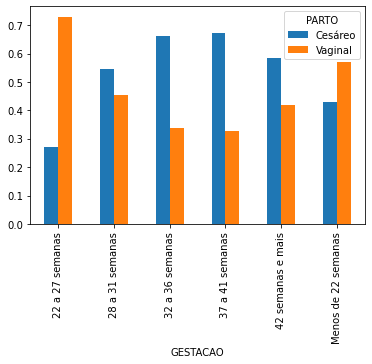

In [68]:
freq_pctlin.plot.bar()

No gráfico acima vemos como a proporção entre partos normais(vaginais) X cesarianas 
varia com o tempo de gestação.

Para tempos de gestação de até 27 semanas predominam os partos normais. 
Por exemplo, entre 22 a 27 semanas mais de 72% dos partos são normais.
Mas entre 32 a 41 semanas essa proporcão muda drasticamente: apenas 
(aproximadamente) um terço dos partos são normais e dois terços são cesarianas.

Para tempos intermediários de gestação (de 28 a 31 semanas) a proporção é
mais equilibrada, ou seja, quase meio a meio.
